# [spaCy](http://spacy.io/docs/#examples)

In [4]:
# 导入工具包和英文模型
# python -m spacy download en 用管理员身份打开CMD

import spacy
nlp = spacy.load('en_core_web_sm')

### text processing

In [5]:
doc = nlp('Weather is good, very windy and sunny. We have no classes in the afternoon.')

In [6]:
# tokenize
for token in doc:
    print (token)

Weather
is
good
,
very
windy
and
sunny
.
We
have
no
classes
in
the
afternoon
.


In [7]:
#Sentences Segment
for sent in doc.sents:
    print (sent)

Weather is good, very windy and sunny.
We have no classes in the afternoon.


### word calss

[参考链接](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

In [8]:
for token in doc:
    print ('{}-{}'.format(token,token.pos_))

Weather-NOUN
is-AUX
good-ADJ
,-PUNCT
very-ADV
windy-ADJ
and-CCONJ
sunny-ADJ
.-PUNCT
We-PRON
have-VERB
no-DET
classes-NOUN
in-ADP
the-DET
afternoon-NOUN
.-PUNCT


## Named Entity Recognition(NER)

In [9]:
doc_2 = nlp("I went to Paris where I met my old friend Jack from uni.")
for ent in doc_2.ents:
    print ('{}-{}'.format(ent,ent.label_))

Paris-GPE
Jack-PERSON


In [10]:
from spacy import displacy
 
doc = nlp('I went to Paris where I met my old friend Jack from uni.')
displacy.render(doc,style='ent',jupyter=True)

### 找到书中所有人物名字

In [11]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

In [13]:
text = read_file('./pride_and_prejudice.txt')
processed_text = nlp(text)

In [ ]:
processed_text

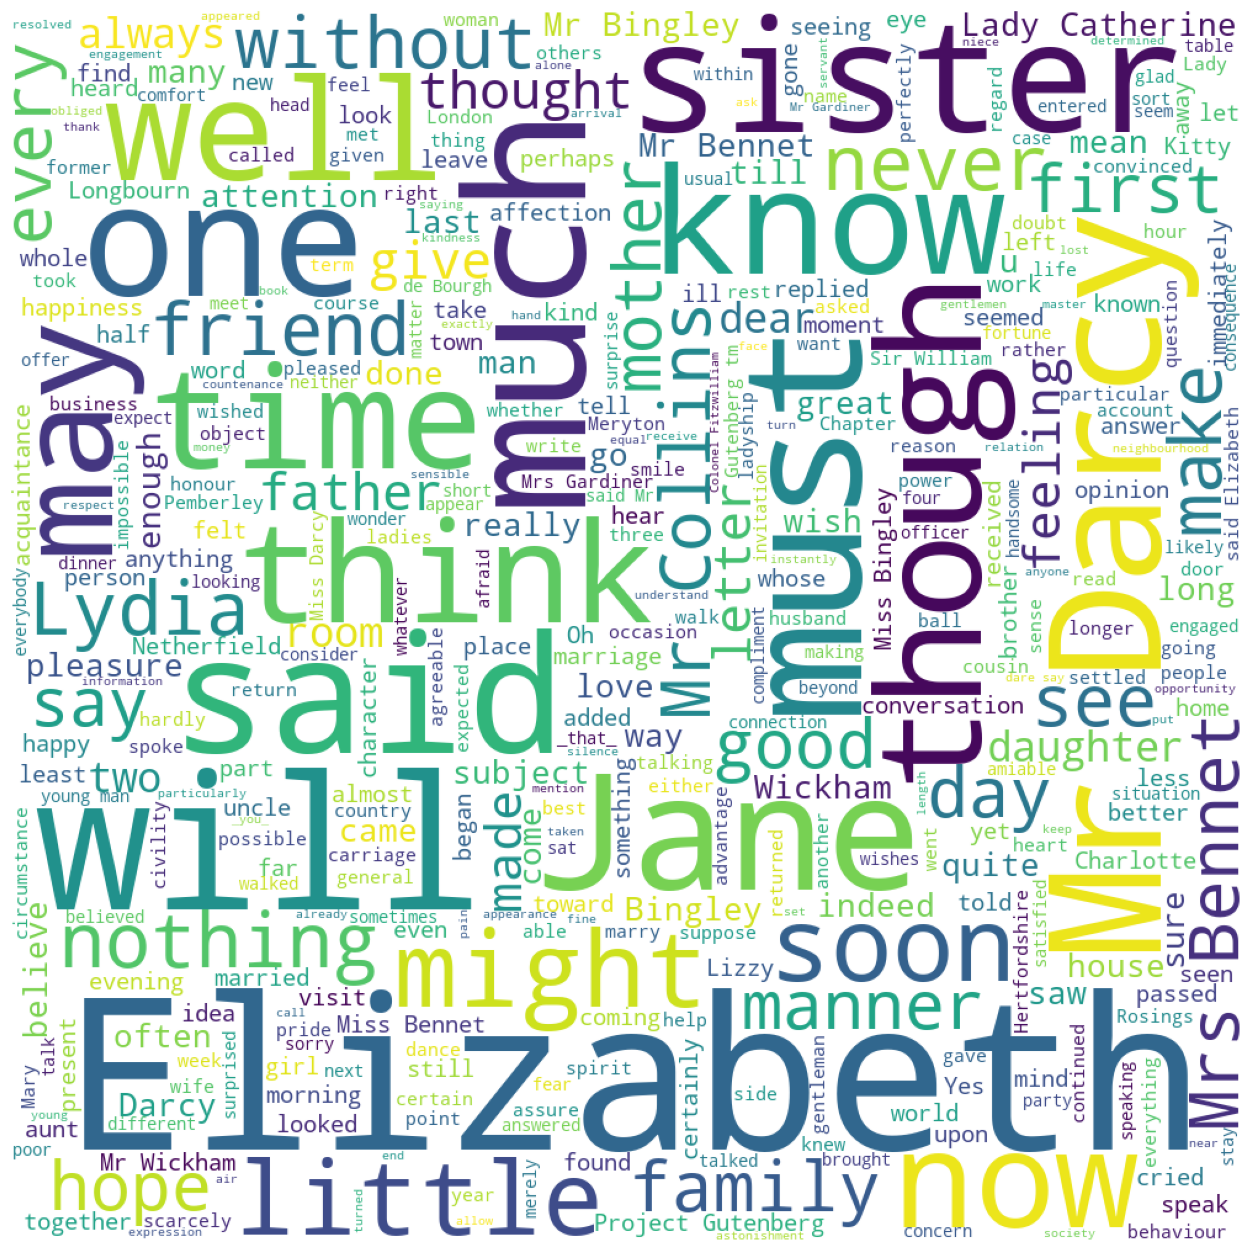

In [17]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

my_wordcloud = WordCloud(  
    background_color='white',  #设置背景颜色
    max_words=400,#设置最大实现的字数
    #mask=imread('./data/mapofChina.jpg'),   
    width=1000,
    height=1000
).generate_from_text(text)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  # 展示词云
my_wordcloud.to_file('result.jpg')

In [18]:
sentences = [s for s in processed_text.sents]
print (len(sentences))

5824


In [19]:
sentences[:5]

[The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen
 
 This eBook is for the use of anyone anywhere at no cost and with
 almost no restrictions whatsoever.  ,
 You may copy it, give it away or
 re-use it under the terms of the Project Gutenberg License included
 with this eBook or online at www.gutenberg.org
 
 
 Title: Pride and Prejudice
 
 Author: Jane Austen
 
 Posting Date: August 26, 2008,
 [EBook #1342]
 Release Date: June, 1998
 Last updated:,
 February 15, 2015]
 
 Language: English
 
 
 *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***
 
 
 
 
 Produced by Anonymous Volunteers
 
 
 
 
 
 PRIDE AND PREJUDICE
 ,
 By Jane Austen
 
 
 
 Chapter 1
 
 ]

In [20]:
from collections import Counter,defaultdict

In [21]:
def find_person(doc):
    c = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'PERSON':
            c[ent.lemma_]+=1
    return c.most_common(10)
print (find_person(processed_text))

[('Elizabeth', 624), ('Darcy', 411), ('Jane', 280), ('Bennet', 245), ('Collins', 179), ('Bingley', 163), ('Wickham', 114), ('Lizzy', 94), ('Gardiner', 94), ('Lady Catherine', 81)]
